<a href="https://colab.research.google.com/github/mungaicynthia/Capstone-Project/blob/main/Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!pip install xgboost --quiet
!pip install scikit-learn pandas matplotlib seaborn --quiet


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb


In [ ]:
# Loading the dataset
df = pd.read_csv('/content/data_to_be_cleansed.csv')


df.head()


,Unnamed: 0,text,title,target
0,0,Welcome to /r/depression's check-in post - a p...,"Regular check-in post, with information about ...",1
1,1,We understand that most people who reply immed...,Our most-broken and least-understood rules is ...,1
2,2,Anyone else just miss physical touch? I crave ...,"I haven’t been touched, or even hugged, in so ...",1
3,3,I’m just so ashamed. Everyone and everything f...,Being Depressed is Embarrassing,1
4,4,I really need a friend. I don't even have a si...,I'm desperate for a friend and to feel loved b...,1


In [ ]:
# Dropping rows where 'text' is missing
df = df.dropna(subset=['text'])


df.rename(columns={'target': 'label'}, inplace=True)


df.head()


<ipython-input-5-9f01ef97a319>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'target': 'label'}, inplace=True)


,Unnamed: 0,text,title,label
0,0,Welcome to /r/depression's check-in post - a p...,"Regular check-in post, with information about ...",1
1,1,We understand that most people who reply immed...,Our most-broken and least-understood rules is ...,1
2,2,Anyone else just miss physical touch? I crave ...,"I haven’t been touched, or even hugged, in so ...",1
3,3,I’m just so ashamed. Everyone and everything f...,Being Depressed is Embarrassing,1
4,4,I really need a friend. I don't even have a si...,I'm desperate for a friend and to feel loved b...,1


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['label_encoded'] = label_encoder.fit_transform(df['label'])

# Checking mappings
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)


Label Mapping: {np.int64(0): np.int64(0), np.int64(1): np.int64(1), np.int64(2): np.int64(2), np.int64(3): np.int64(3), np.int64(4): np.int64(4)}


<ipython-input-6-df74deafdb2d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label_encoded'] = label_encoder.fit_transform(df['label'])


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df['text'], df['label_encoded'], test_size=0.2, random_state=42, stratify=df['label_encoded']
)


In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression

# Creating the Logistic Regression model
logreg = LogisticRegression(max_iter=200)

# Training the model
logreg.fit(X_train_tfidf, y_train)

# Predict the labels on the test set
y_pred_logreg = logreg.predict(X_test_tfidf)


In [ ]:
from sklearn.metrics import classification_report

# Converting numeric class labels to string class labels for target_names
target_names = [str(cls) for cls in label_encoder.classes_]


print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg, target_names=target_names))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       220
           1       0.70      0.74      0.72       241
           2       0.83      0.78      0.80       217
           3       0.72      0.75      0.73       215
           4       0.75      0.75      0.75       229

    accuracy                           0.76      1122
   macro avg       0.77      0.76      0.76      1122
weighted avg       0.76      0.76      0.76      1122



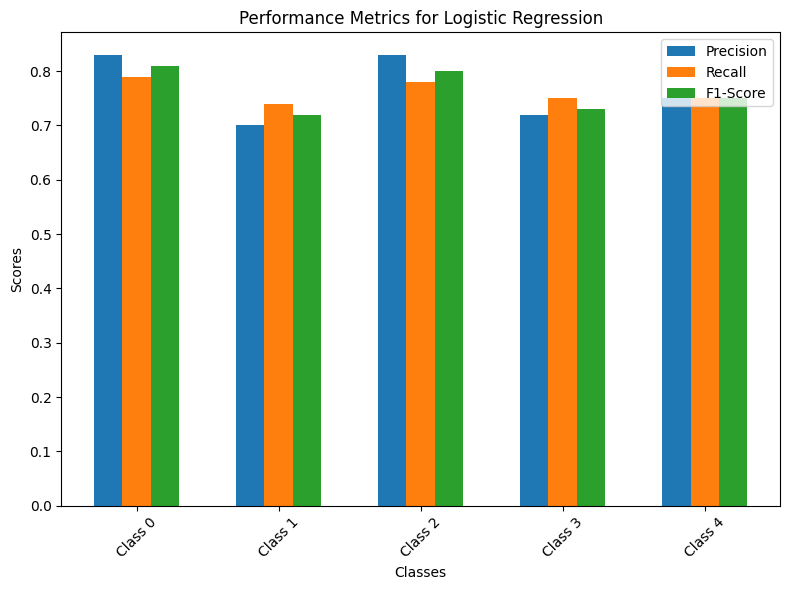

In [ ]:
# Classification report data (from your output)
classes = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4']
precision = [0.83, 0.70, 0.83, 0.72, 0.75]
recall = [0.79, 0.74, 0.78, 0.75, 0.75]
f1_score = [0.81, 0.72, 0.80, 0.73, 0.75]


x = np.arange(len(classes))
width = 0.2


fig, ax = plt.subplots(figsize=(8, 6))

# Plot precision, recall, and F1 score for each class
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_score, width, label='F1-Score')


ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics for Logistic Regression')
ax.set_xticks(x)
ax.set_xticklabels(classes, rotation=45)
ax.legend()


plt.tight_layout()
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib



# Prepare data
X = df['text']
y = df['label']

# Vectorizing the text using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_tfidf = vectorizer.fit_transform(X)

# Training the Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_tfidf, y)

# Saving the model and the vectorizer
joblib.dump(logreg_model, 'logreg_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

print("Logistic Regression model and vectorizer saved successfully!")


Logistic Regression model and vectorizer saved successfully!


In [ ]:
import joblib

# Loading the logistic regression model
logreg_model = joblib.load('logreg_model.pkl')


In [ ]:

tfidf_vectorizer = joblib.load('tfidf_vectorizer.pkl')


new_text_data = ["I feel really stressed out today."]
X_new = tfidf_vectorizer.transform(new_text_data)


In [ ]:
predictions = logreg_model.predict(X_new)


print(predictions)


[0]


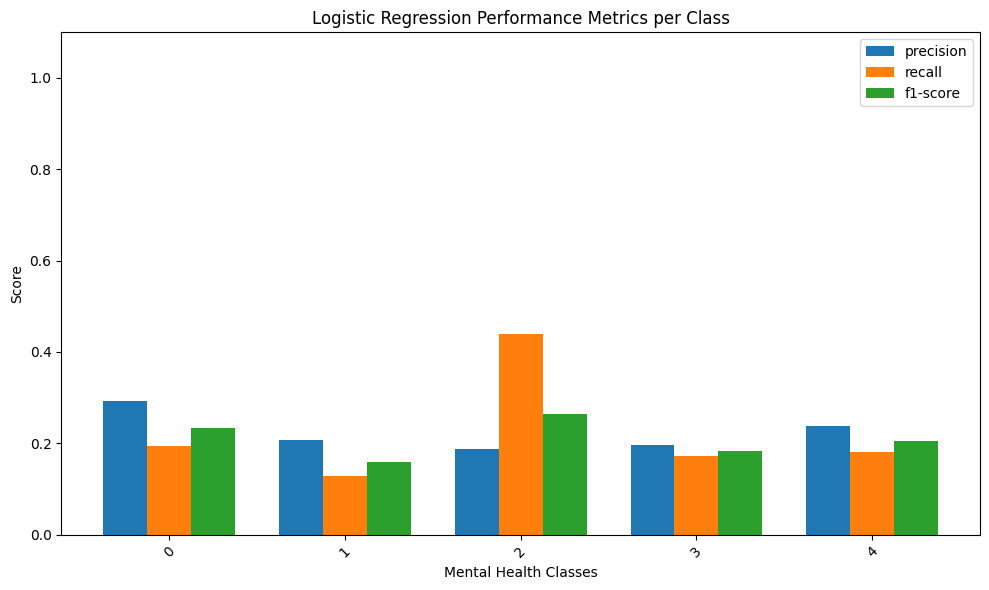

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report


y_pred_logreg = logreg_model.predict(X_test_tfidf)


report_logreg = classification_report(y_test, y_pred_logreg, output_dict=True)


classes = list(label_encoder.classes_)
metrics = ['precision', 'recall', 'f1-score']


data_logreg = {metric: [report_logreg[str(i)][metric] for i in range(len(classes))] for metric in metrics}

x = range(len(classes))
bar_width = 0.25

plt.figure(figsize=(10, 6))
for idx, metric in enumerate(metrics):
    plt.bar([p + bar_width * idx for p in x], data_logreg[metric], width=bar_width, label=metric)

plt.xlabel('Mental Health Classes')
plt.ylabel('Score')
plt.title('Logistic Regression Performance Metrics per Class')
plt.xticks([p + bar_width for p in x], classes, rotation=45)
plt.ylim(0, 1.1)
plt.legend()
plt.tight_layout()
plt.show()


# New Section

In [ ]:
import xgboost as xgb


xg_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')


xg_model.fit(X_train_tfidf, y_train)

y_pred_xg = xg_model.predict(X_test_tfidf)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:14:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
# XGBoost Classification Report
print("\nXGBoost Classification Report:")
print(classification_report(y_test, y_pred_xg, target_names=target_names))



XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.82      0.85       220
           1       0.71      0.70      0.71       241
           2       0.84      0.85      0.85       217
           3       0.74      0.80      0.77       215
           4       0.79      0.79      0.79       229

    accuracy                           0.79      1122
   macro avg       0.79      0.79      0.79      1122
weighted avg       0.79      0.79      0.79      1122



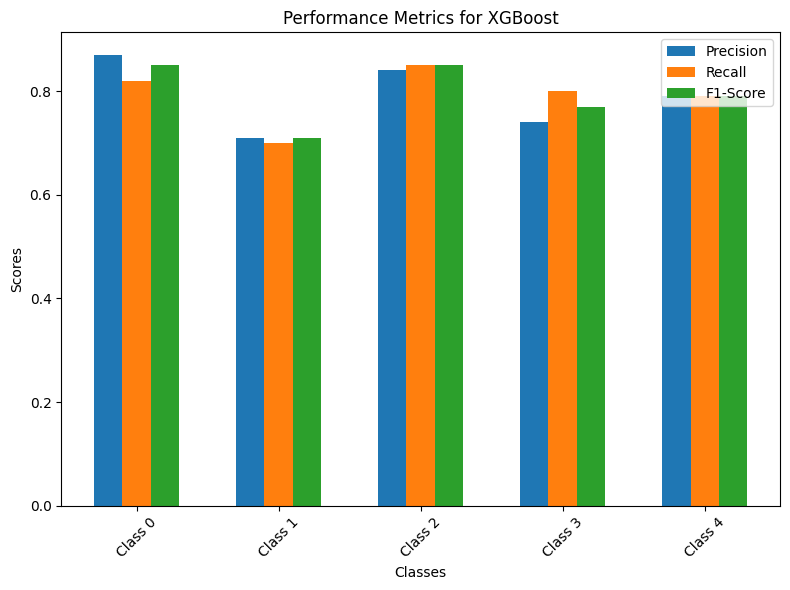

In [ ]:
# XGBoost Classification Report Data (from your output)
classes = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4']
precision = [0.87, 0.71, 0.84, 0.74, 0.79]
recall = [0.82, 0.70, 0.85, 0.80, 0.79]
f1_score = [0.85, 0.71, 0.85, 0.77, 0.79]


x = np.arange(len(classes))
width = 0.2


fig, ax = plt.subplots(figsize=(8, 6))


rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_score, width, label='F1-Score')


ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics for XGBoost')
ax.set_xticks(x)
ax.set_xticklabels(classes, rotation=45)
ax.legend()


plt.tight_layout()
plt.show()


In [ ]:
from xgboost import XGBClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import joblib


X = df['text']
y = df['label_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train_tfidf, y_train)


joblib.dump(xgb_model, 'xgb_model.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

print("✅ XGBoost model and vectorizer saved successfully!")


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:56:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ XGBoost model and vectorizer saved successfully!


In [ ]:

xgb_model = joblib.load('xgb_model.pkl')
tfidf = joblib.load('tfidf_vectorizer.pkl')


new_text = ["I feel very anxious and hopeless"]
new_text_tfidf = tfidf.transform(new_text)
prediction = xgb_model.predict(new_text_tfidf)

print("Prediction:", prediction)


Prediction: [4]


In [ ]:

tfidf_vectorizer = joblib.load('tfidf_vectorizer.pkl')

new_texts = ["I'm feeling very low and can't concentrate."]
new_tfidf = tfidf_vectorizer.transform(new_texts)

# Predict
prediction = xgb_model.predict(new_tfidf)
print("Predicted label:", prediction)


Predicted label: [1]


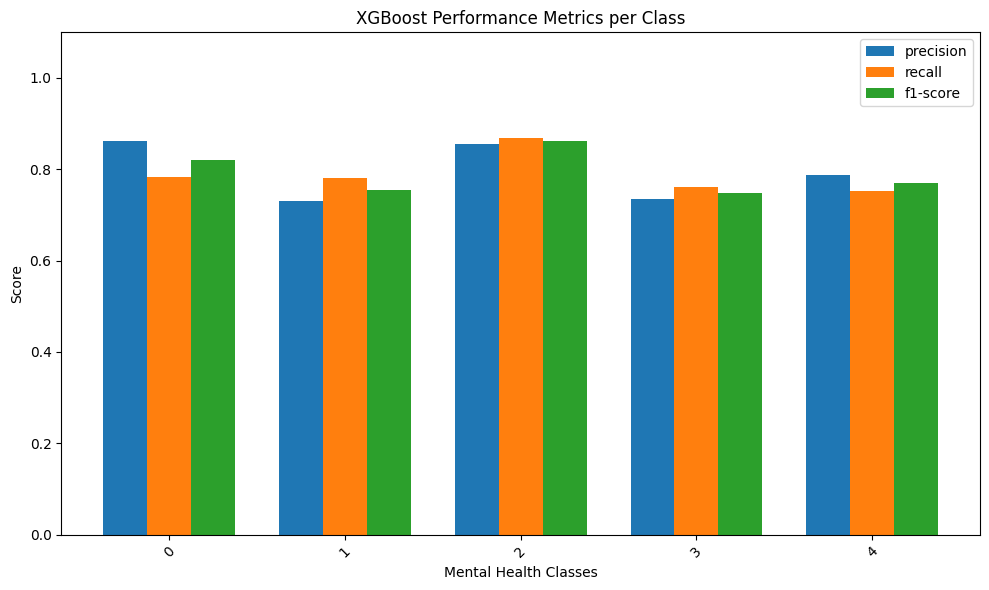

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report


y_pred_xgb = xgb_model.predict(X_test_tfidf)


report = classification_report(y_test, y_pred_xgb, output_dict=True)


classes = list(label_encoder.classes_)
metrics = ['precision', 'recall', 'f1-score']


data = {metric: [report[str(i)][metric] for i in range(len(classes))] for metric in metrics}

x = range(len(classes))
bar_width = 0.25

plt.figure(figsize=(10, 6))
for idx, metric in enumerate(metrics):
    plt.bar([p + bar_width * idx for p in x], data[metric], width=bar_width, label=metric)

plt.xlabel('Mental Health Classes')
plt.ylabel('Score')
plt.title('XGBoost Performance Metrics per Class')
plt.xticks([p + bar_width for p in x], classes, rotation=45)
plt.ylim(0, 1.1)
plt.legend()
plt.tight_layout()
plt.show()



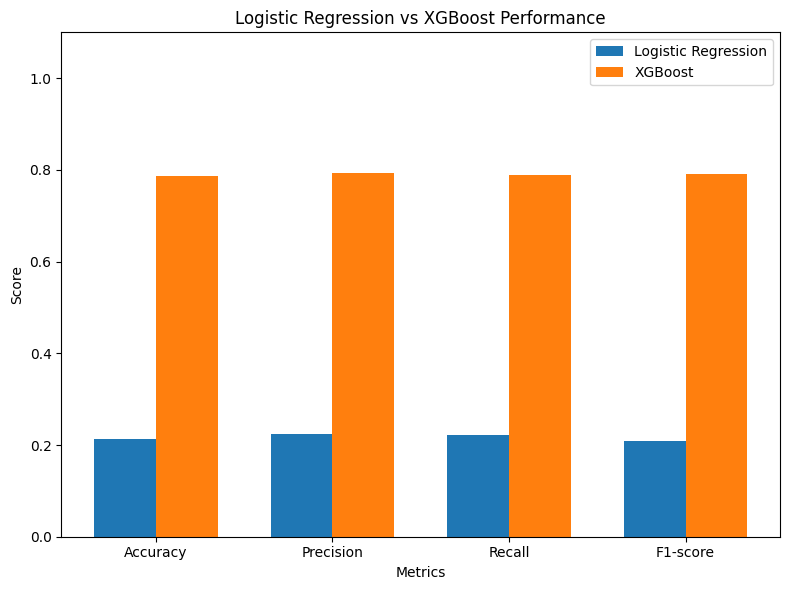

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score


y_pred_logreg = logreg_model.predict(X_test_tfidf)
y_pred_xgb = xgb_model.predict(X_test_tfidf
report_logreg = classification_report(y_test, y_pred_logreg, output_dict=True)
report_xgb = classification_report(y_test, y_pred_xgb, output_dict=True)

# Collecting macro averaged scores
logreg_scores = [
    accuracy_score(y_test, y_pred_logreg),
    report_logreg['macro avg']['precision'],
    report_logreg['macro avg']['recall'],
    report_logreg['macro avg']['f1-score']
]

xgb_scores = [
    accuracy_score(y_test, y_pred_xgb),
    report_xgb['macro avg']['precision'],
    report_xgb['macro avg']['recall'],
    report_xgb['macro avg']['f1-score']
]


metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
x = range(len(metrics))
bar_width = 0.35

plt.figure(figsize=(8, 6))
plt.bar([i - bar_width/2 for i in x], logreg_scores, width=bar_width, label='Logistic Regression')
plt.bar([i + bar_width/2 for i in x], xgb_scores, width=bar_width, label='XGBoost')

plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Logistic Regression vs XGBoost Performance')
plt.xticks(ticks=x, labels=metrics)
plt.ylim(0, 1.1)
plt.legend()
plt.tight_layout()
plt.show()
